In [1]:
import pandas as pd
import numpy as np

In [2]:
chess = pd.read_csv("chess.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recoding string columns to run a correlation matrix

In [4]:
def recode (series):
    if series == "white":
        return 1
    if series == "black":
        return 2
    if series == "draw":
        return 3
chess['winnerR'] = chess['winner'].apply(recode)

In [5]:
def recode1 (series):
    if series == "outoftime":
        return 1
    if series == "resign":
        return 2
    if series == "mate":
        return 3
    if series == "draw":
        return 4
chess['victory_statusR'] = chess['victory_status'].apply(recode1)

In [6]:
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,winnerR,victory_statusR
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1,1
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,2,2
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1,3


In [7]:
chess1 = chess.drop(['id', 'winner', "victory_status", 'created_at', 'last_move_at', 'rated', 'increment_code', 'black_id', 'white_id', 'moves', 'opening_eco', 'opening_name'], axis=1)

In [8]:
chess1.head()

,turns,white_rating,black_rating,opening_ply,winnerR,victory_statusR
0,13,1500,1191,5,1,1
1,16,1322,1261,4,2,2
2,61,1496,1500,3,1,3
3,61,1439,1454,3,1,3
4,95,1523,1469,5,1,3


In [9]:
chess1.corr(method='pearson')

,turns,white_rating,black_rating,opening_ply,winnerR,victory_statusR
turns,1.000000,0.129753,0.160467,0.055999,0.129875,0.113909
white_rating,0.129753,1.000000,0.634171,0.277379,-0.093497,-0.084577
black_rating,0.160467,0.634171,1.000000,0.255396,0.160843,-0.087829
opening_ply,0.055999,0.277379,0.255396,1.000000,-0.006809,-0.034671
winnerR,0.129875,-0.093497,0.160843,-0.006809,1.000000,0.265574
victory_statusR,0.113909,-0.084577,-0.087829,-0.034671,0.265574,1.000000


In [10]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

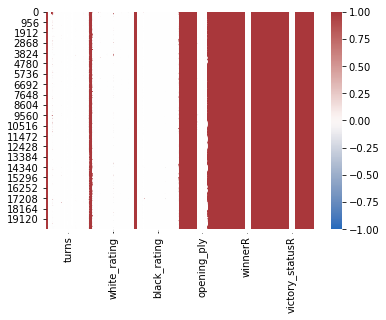

In [24]:
mask = np.triu(np.ones_like(chess1, dtype=bool))
sns.heatmap(chess1, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

## Only thing winner has a significant correlation with is victory_status